To do:\
Посмотреть общие корреляции и мб удалить больше столбцов\
Показать графиком столбцы с большим количеством NA\
Feature engineering? "Сформулировать гипотезы о том, какие сочетания признаков могут быть полезны. Добавить их (если придумаете).  Подсказка (одна из идей если решаете задачу предсказания цен на дома): отрисуйте выборку на карте, посчитайте расстояние до важных объектов в этом городе, посчитайте статистики по районам и по ближайшим объектам (не забудьте, что эти статистики нужно считать по обучающей выборке!)."\
Выбрать и реализовать модель(Выбор алгоритма и его гиперпараметров.
Обосновать выбор алгоритма/его конкретной реализации, если их несколько
Если гиперпараметры подбирались, нужно обосновать необходимость в этом.
Учесть логику работы алгоритма. Не нужно делать one-hot encoding категориальных признаков при использовании CatBoostRegressor, нужно масштабировать признаки при работе с метрическими методами etc.)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
# import pandas_profiling as pp
# pp.ProfileReport(train)

Для обработки выбросов выделим числовые столбцы, построим график количества уникальных значений для них, выберем столбцы с наибольшим количеством и удалим выбросы.

Количество числовых столбцов =  37


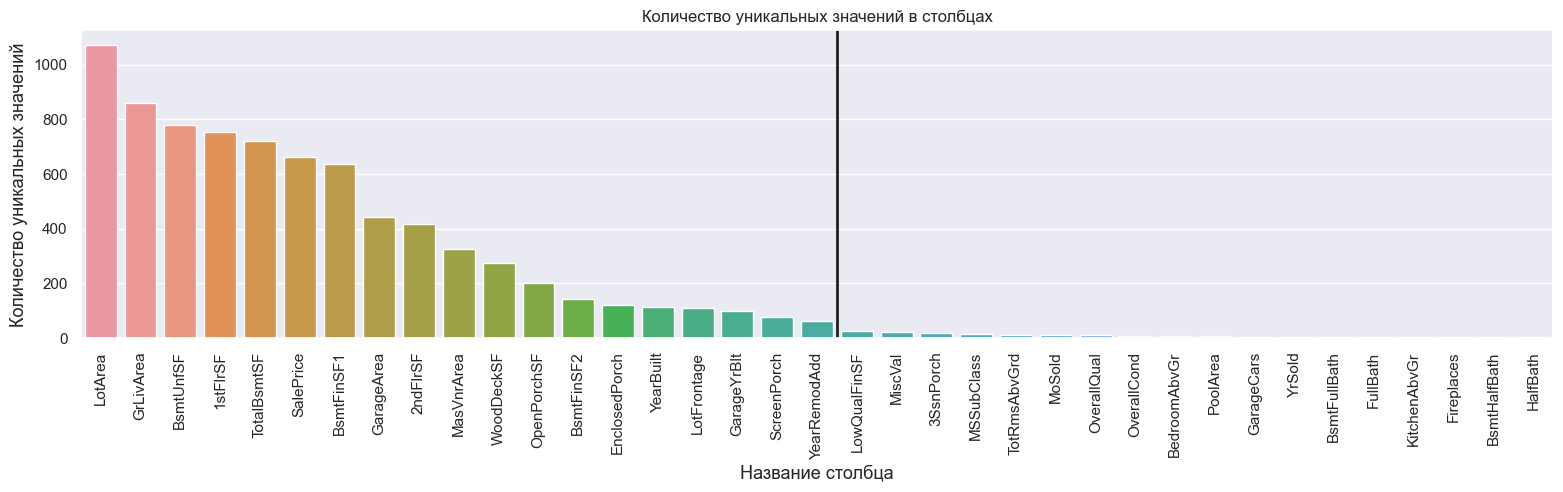

In [4]:
# Выделим числовые столбцы
numeric_columns = train.select_dtypes(exclude=['object']).columns.values.tolist()
print('Количество числовых столбцов = ',len(numeric_columns))
unique_values=[]
for item in numeric_columns: unique_values.append(train[item].nunique())
numeric_column_list = list(zip(numeric_columns, unique_values))
numeric_column_list = sorted(numeric_column_list,key=lambda l:l[1], reverse=True)
numeric_column_list=pd.DataFrame(numeric_column_list, columns=['Column-Names', 'Unique-Values'])


plt.subplots(figsize=(19, 4))
ax = sns.barplot(x=numeric_column_list['Column-Names'], y=numeric_column_list['Unique-Values'])
plt.xticks(rotation=90)
plt.ylabel('Количество уникальных значений', fontsize=13)
plt.xlabel('Название столбца', fontsize=13)
plt.title('Количество уникальных значений в столбцах')
ax.axvline(x=18.5, linewidth=2, color='#221f1f')
plt.show()

Выберем первые 19 столбцов

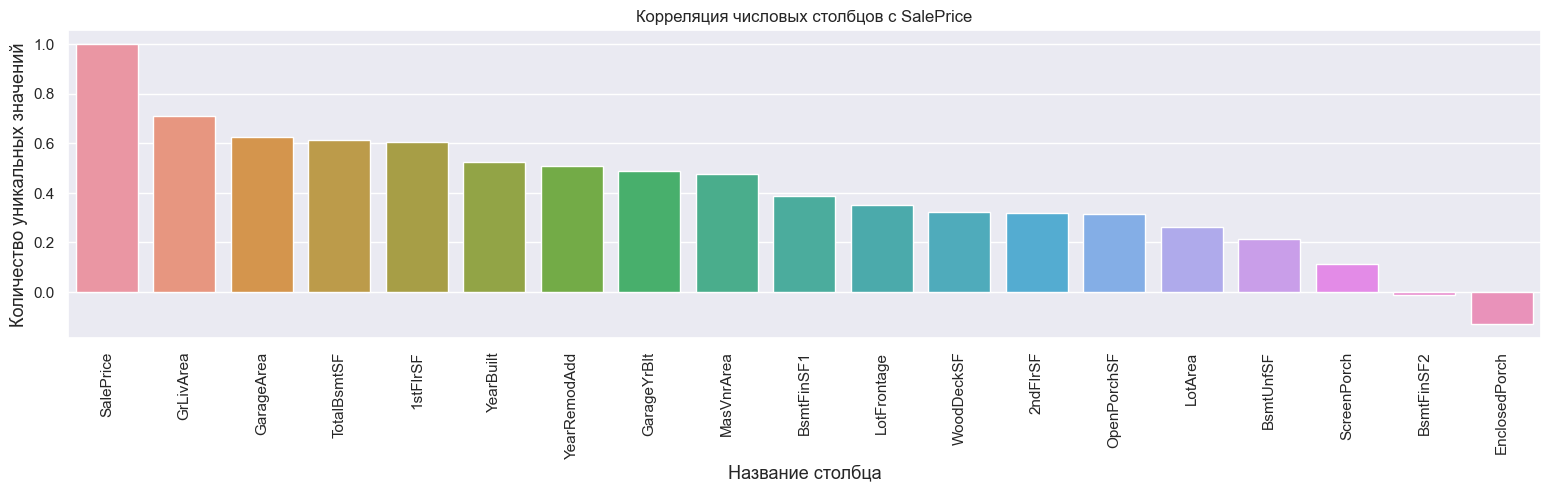

In [5]:
# Проверим корреляцию выбранных колонок с SalePrice
highly_unique_columns = numeric_column_list.drop(numeric_column_list[numeric_column_list['Unique-Values'] < 49].index)
cols = highly_unique_columns['Column-Names']
corrs=[]
for item in cols:
    corrs.append((train[item].corr(train['SalePrice'])))
    
# Создадим DataFrame из значений корреляций
ist = pd.DataFrame(
    {'cols': cols,
     'corrs': corrs
    })
ist = ist.sort_values(by='corrs', ascending=False)


plt.subplots(figsize=(19, 4))
sns.barplot(x=ist['cols'], y=ist['corrs'])
plt.xticks(rotation=90)
plt.ylabel('Количество уникальных значений', fontsize=13)
plt.xlabel('Название столбца', fontsize=13)
plt.title('Корреляция числовых столбцов с SalePrice')
plt.show()

Видим, что большинство столбцов имеет высокую корреляцию с SalePrice, кроме последних 3.\
Нарисуем Scatter-Plot для этих столбцов с SalePrice и выделим выбросы.

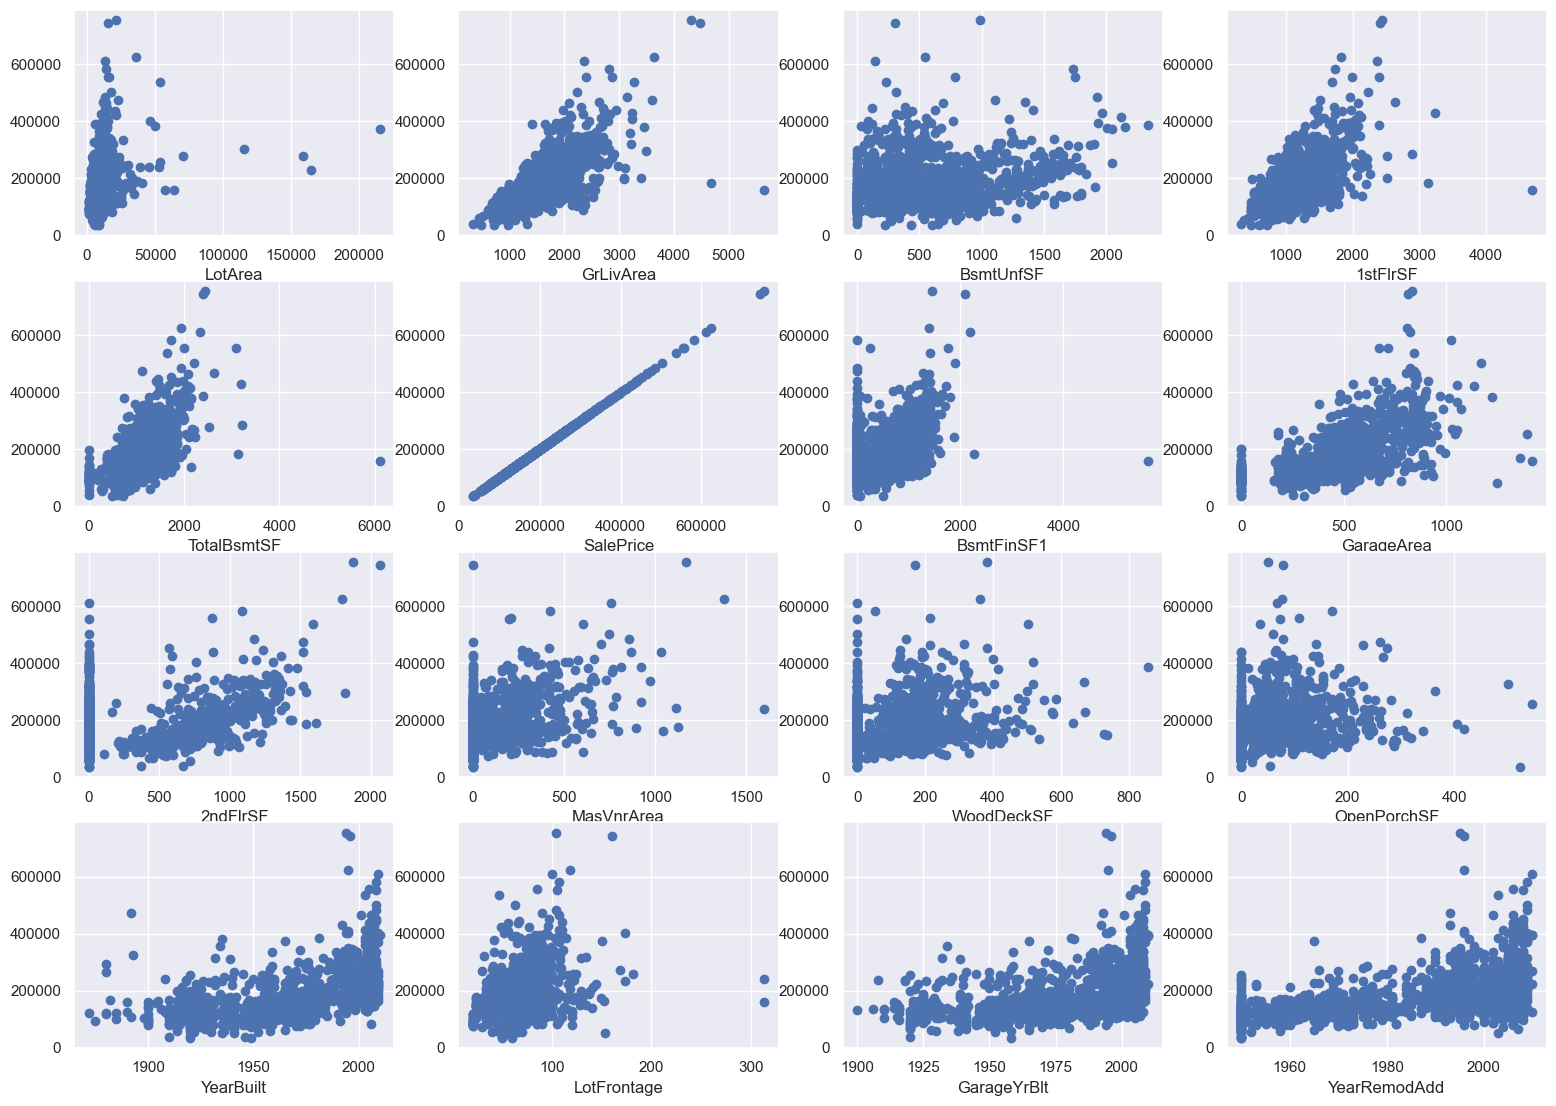

In [6]:
cols = cols.drop(cols[((cols == 'ScreenPorch') + (cols == 'BsmtFinSF2') + (cols == 'EnclosedPorch'))].index).reset_index(drop=True)

# Функция построения Scatter-Plot относительно SalePrice
def relation_with_SalePrice(c,column):
    plt.subplot(5, 4, c)
    plt.scatter(x = train[column], y = train['SalePrice'])
    plt.xlabel(column)    

c=1
plt.subplots(figsize=(19, 17))
for item in cols:
    relation_with_SalePrice(c,item)
    c=c+1
plt.show()

Видим выбросы в столбцах 1stFlrSF, BsmtFinSF1, MasVnrArea, LotArea, LotFrontage, GrLivArea.\
Удалим выбросы.

In [7]:
# Функция для построения графиков
def outlier_check_plot(column):
    plt.subplots(figsize=(19, 5))
    # SCATTER PLOT
    plt.subplot(1, 3, 1)
    plt.scatter(x = train[column].sort_values(ascending=False)[:16], y = train.index[:16], color='red')
    plt.ylabel('Порядковый номер', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Рис 1: 15 наибольших значений из столбца {}'.format(column))

    # DISTRIBUTION-PLOT
    plt.subplot(1, 3, 2)                                                                                
    sns.distplot(train[column],color='red', rug=True, hist=False)
    plt.ylabel('Распределение', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Рис 2: График распределения значений столбца {}'.format(column))

    # SCATTER-PLOT в зависимости от SALEPRICE 
    plt.subplot(1, 3, 3)
    plt.scatter(x = train[column], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Рис 3: Scatter-plot столбца {} с SalePrice'.format(column))
    plt.show()

До удаления выборосов 1stFlrSF: 


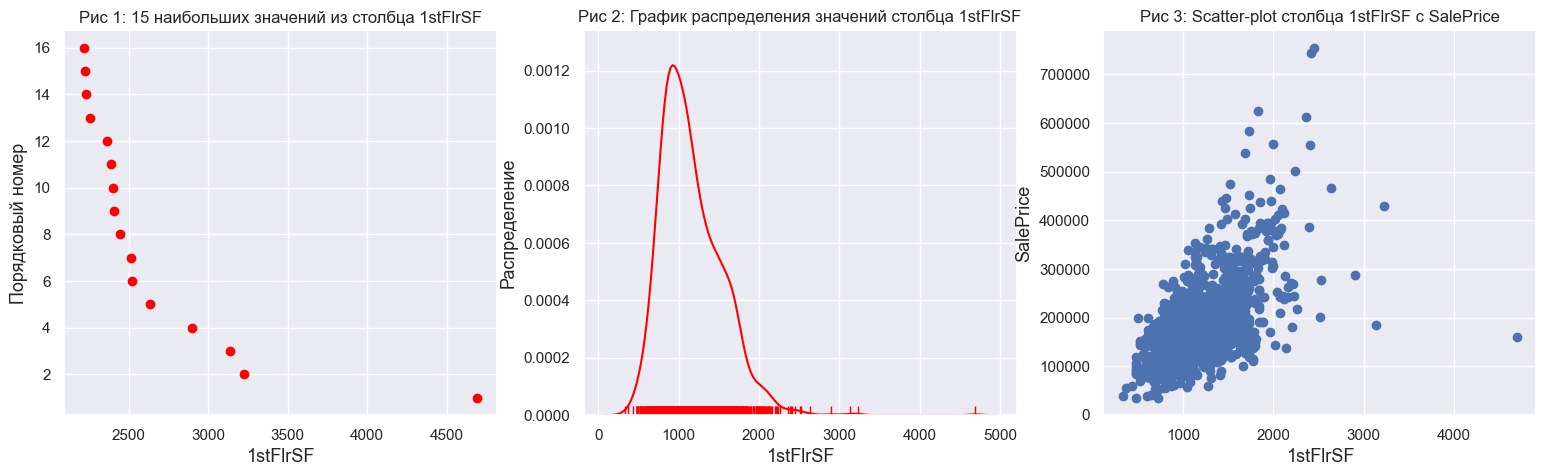

In [8]:
print('До удаления выборосов 1stFlrSF: ')
outlier_check_plot('1stFlrSF')

Видим один выброс в котором 1stFlrSF > 4000, но SalePrice слишком низкий.

После удаления выбросов 1stFlrSF: 


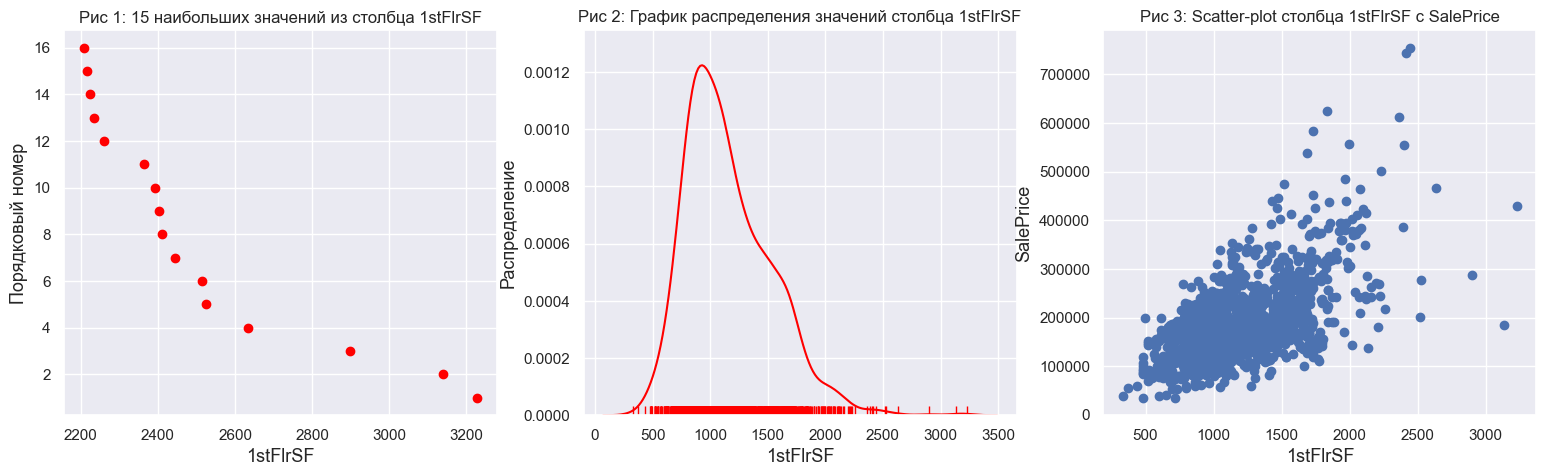

In [9]:
train = train.drop(train[train['1stFlrSF'] > 4000].index)
print('После удаления выбросов 1stFlrSF: ')
outlier_check_plot('1stFlrSF')

До удаления выборосов BsmtFinSF1: 


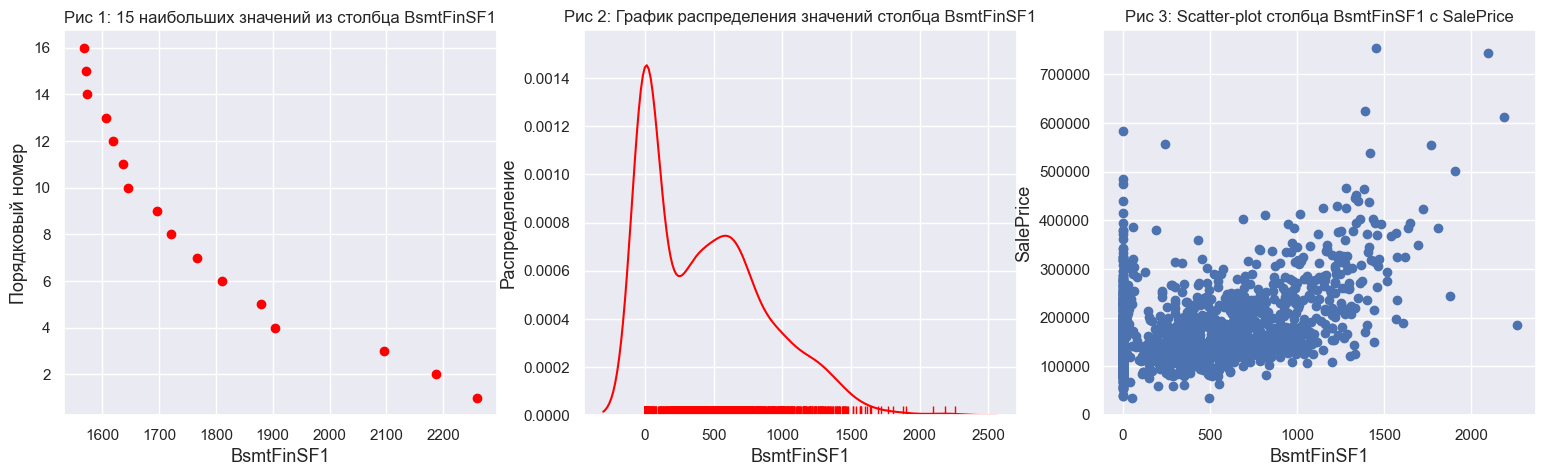

In [10]:
print('До удаления выборосов BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1')

Видим выброс с значением BsmtFinSF1 > 2000 и SalePrice < 200000

После удаления выбросов BsmtFinSF1: 


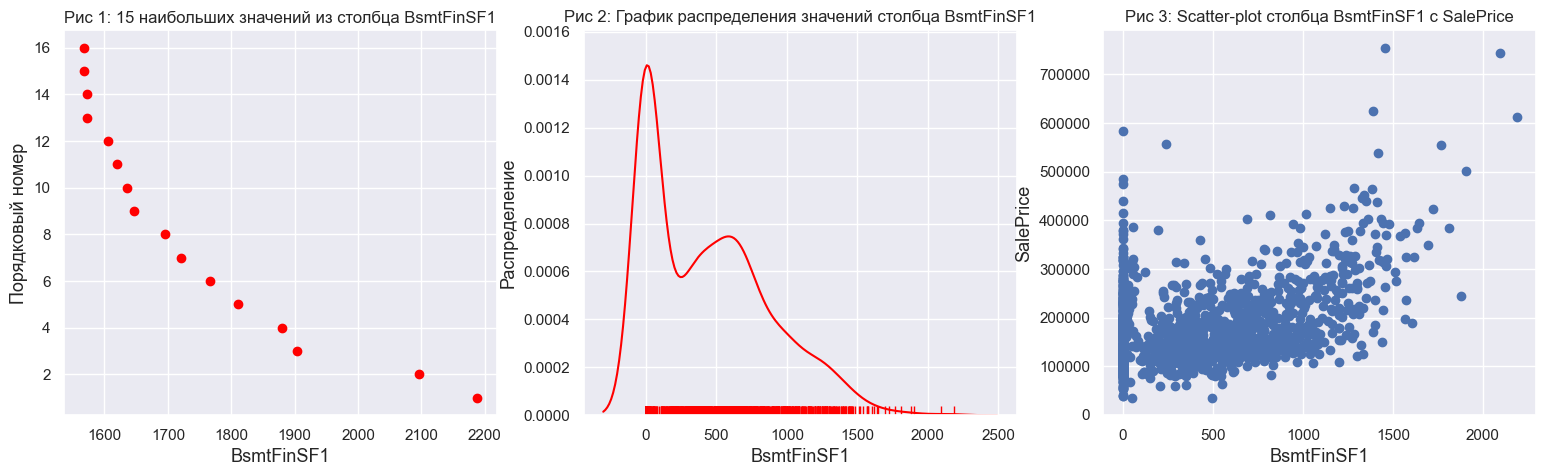

In [11]:
train = train.drop(train[(train['BsmtFinSF1']>2000) & (train['SalePrice']<200000)].index)
print('После удаления выбросов BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1')

До удаления выборосов LotArea: 


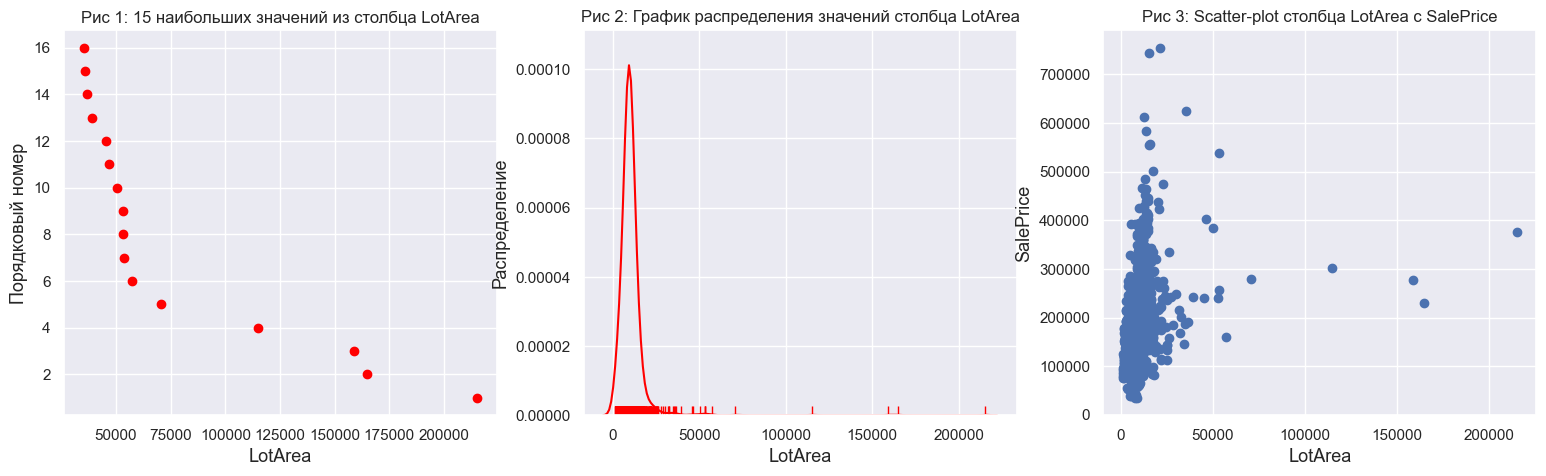

In [12]:
print('До удаления выборосов LotArea: ')
outlier_check_plot('LotArea')

Выбросы со значениями выше 80000

После удаления выбросов LotArea: 


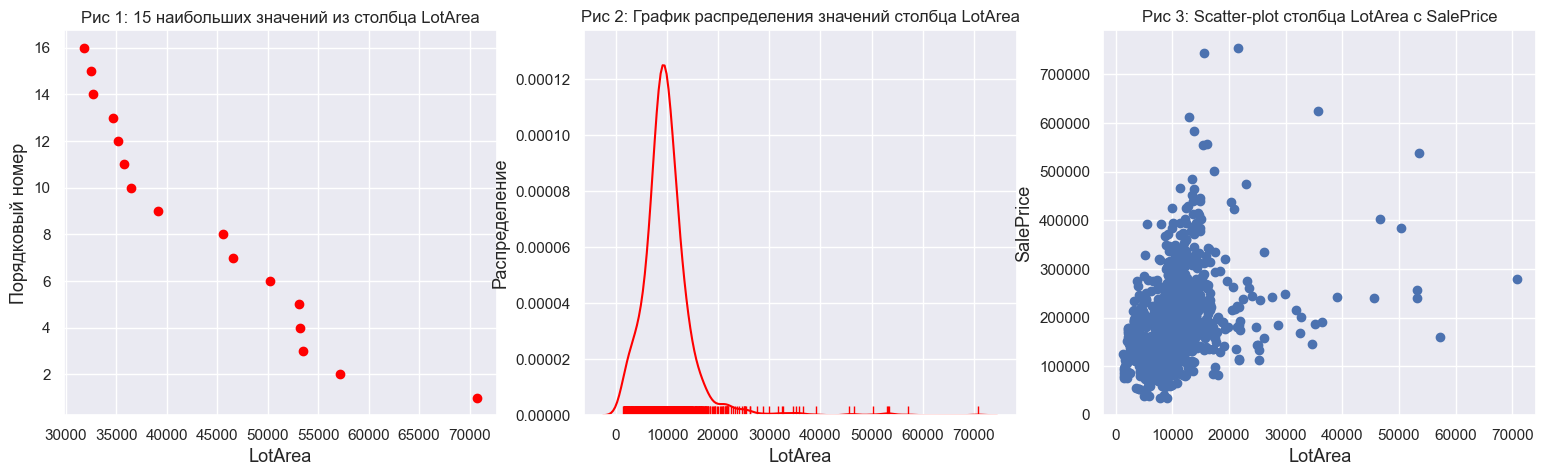

In [13]:
train = train.drop(train[train['LotArea'] > 80000].index)
print('После удаления выбросов LotArea: ')
outlier_check_plot('LotArea')

До удаления выборосов GrLivArea: 


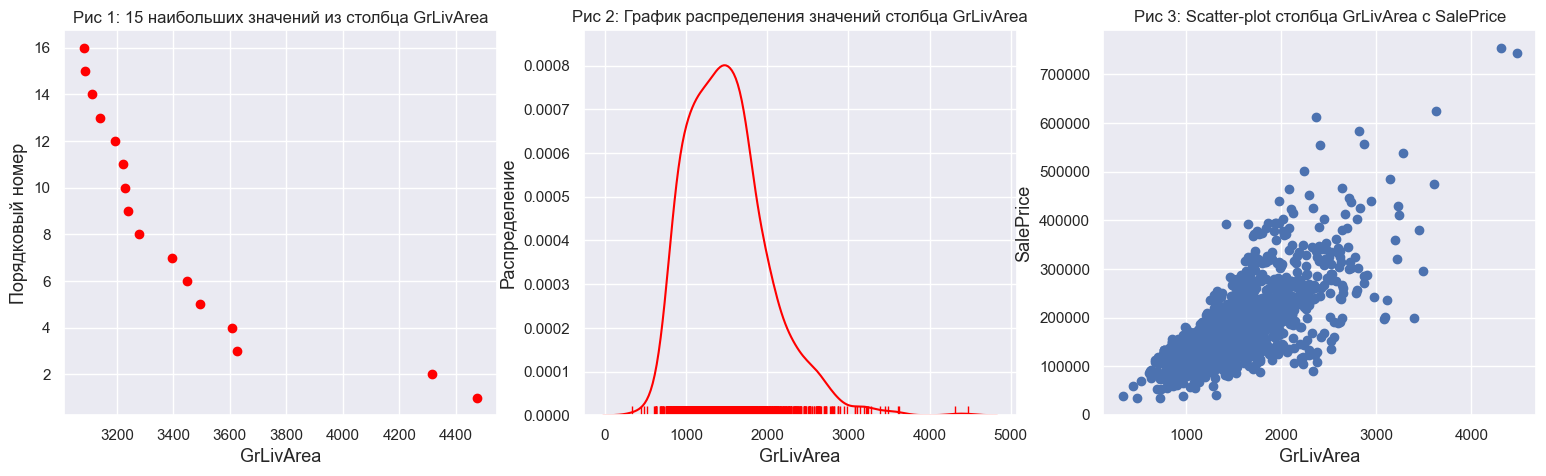

In [14]:
print('До удаления выборосов GrLivArea: ')
outlier_check_plot('GrLivArea')

Выбросов нет

До удаления выбросов MasVnrArea: 


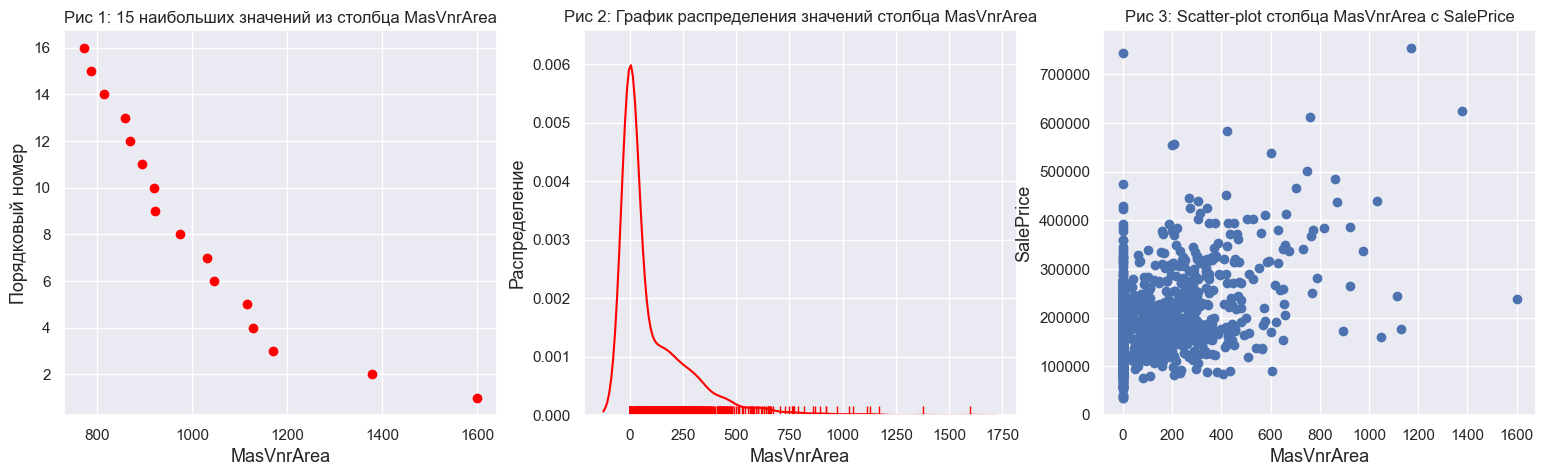

In [15]:
print('До удаления выбросов MasVnrArea: ')
outlier_check_plot('MasVnrArea')

Выброс со значением 1600

После удаления выбросов MasVnrArea: 


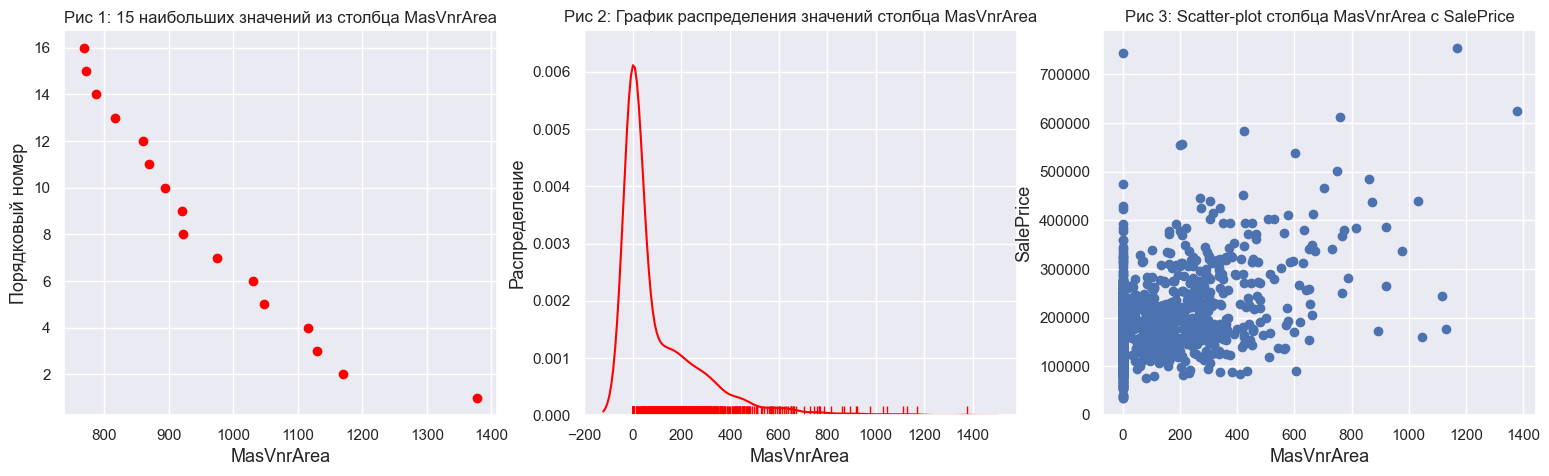

In [16]:
train = train.drop(train[train['MasVnrArea'] > 1500].index)
print('После удаления выбросов MasVnrArea: ')
outlier_check_plot('MasVnrArea')

До удаления выборосов LotFrontage: 


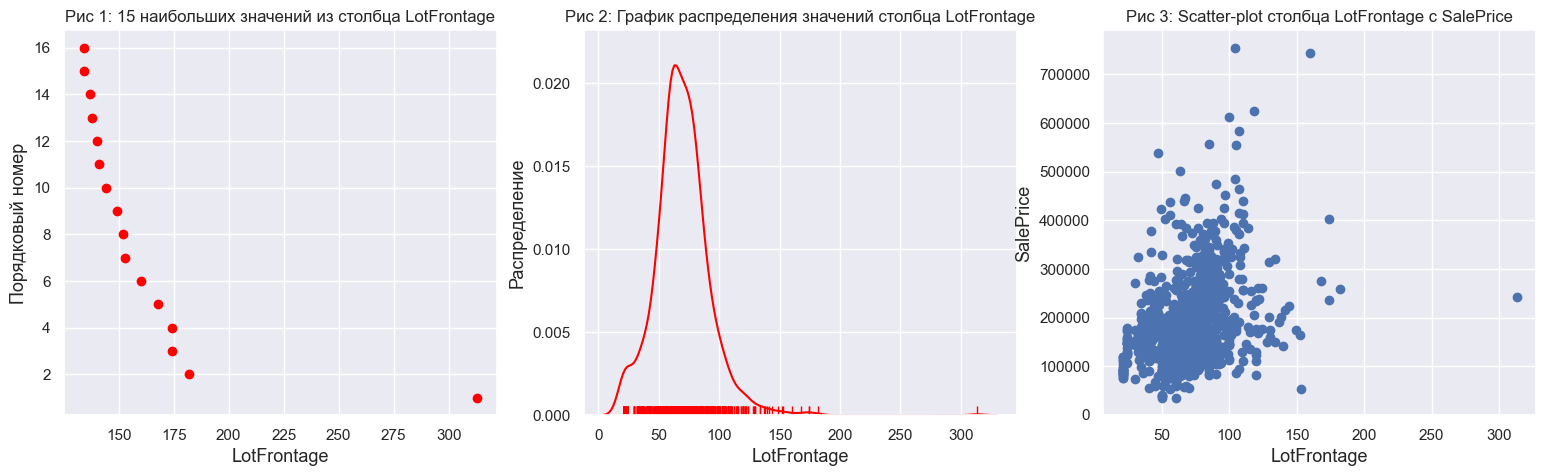

In [17]:
print('До удаления выборосов LotFrontage: ')
outlier_check_plot('LotFrontage')

Выброс с значением > 300

После удаления выбросов LotFrontage: 


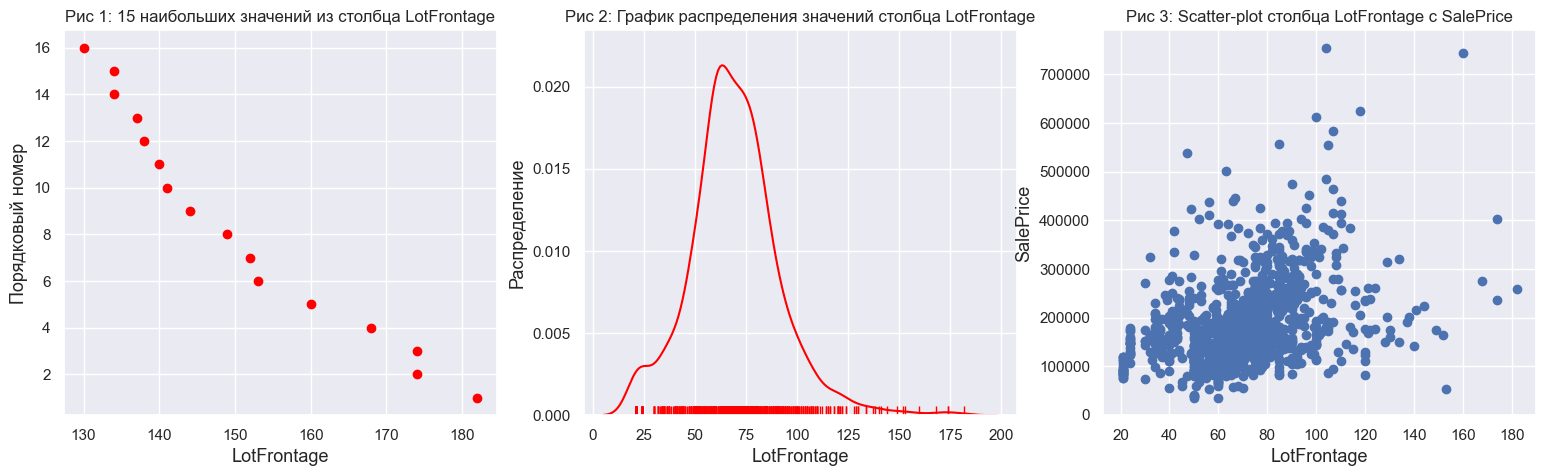

In [18]:
train = train.drop(train[train["LotFrontage"] > 300].index)
print('После удаления выбросов LotFrontage: ')
outlier_check_plot('LotFrontage')

До удаления выборосов TotalBsmtSF: 


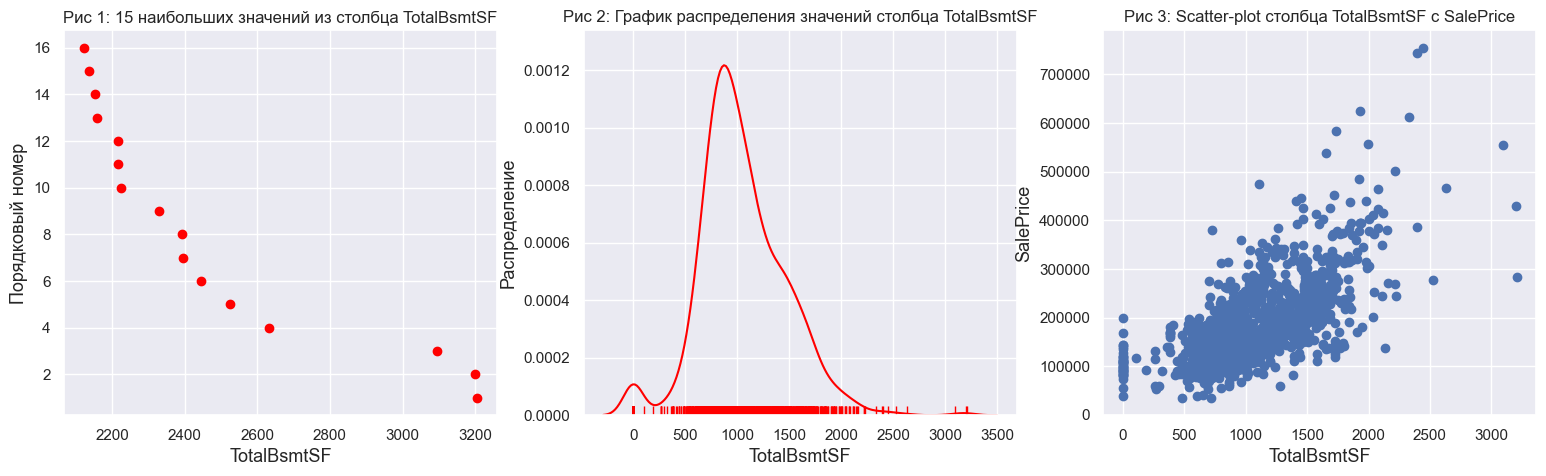

In [19]:
print('До удаления выборосов TotalBsmtSF: ')
outlier_check_plot('TotalBsmtSF')

Выбросов нет

Построим корреляционную матрицу с значениями > 0.5

In [40]:
corr[abs(corr) > 0.75].index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [43]:
corr = train.corr(numeric_only=True)
highest_corr_features = corr[[abs(corr) > 0.75]].index
plt.figure(figsize=(30,30))
sns.heatmap(train[highest_corr_features].corr(),annot=True)

ValueError: Index data must be 1-dimensional

<AxesSubplot: >

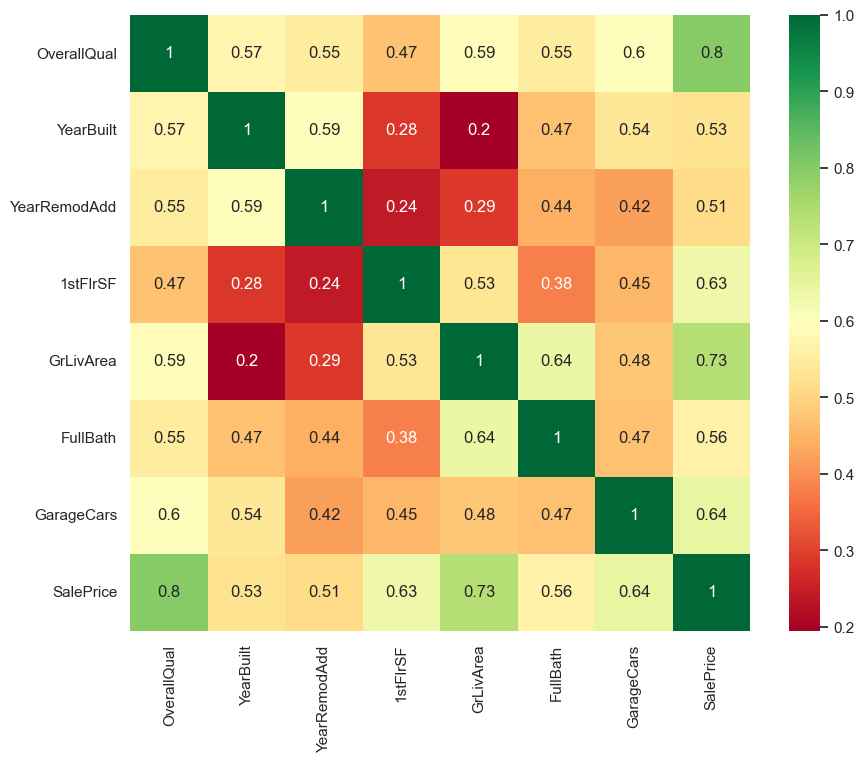

In [41]:
corr = train.corr(numeric_only=True)
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,8))
sns.heatmap(train[highest_corr_features].corr(),annot=True,cmap="RdYlGn")

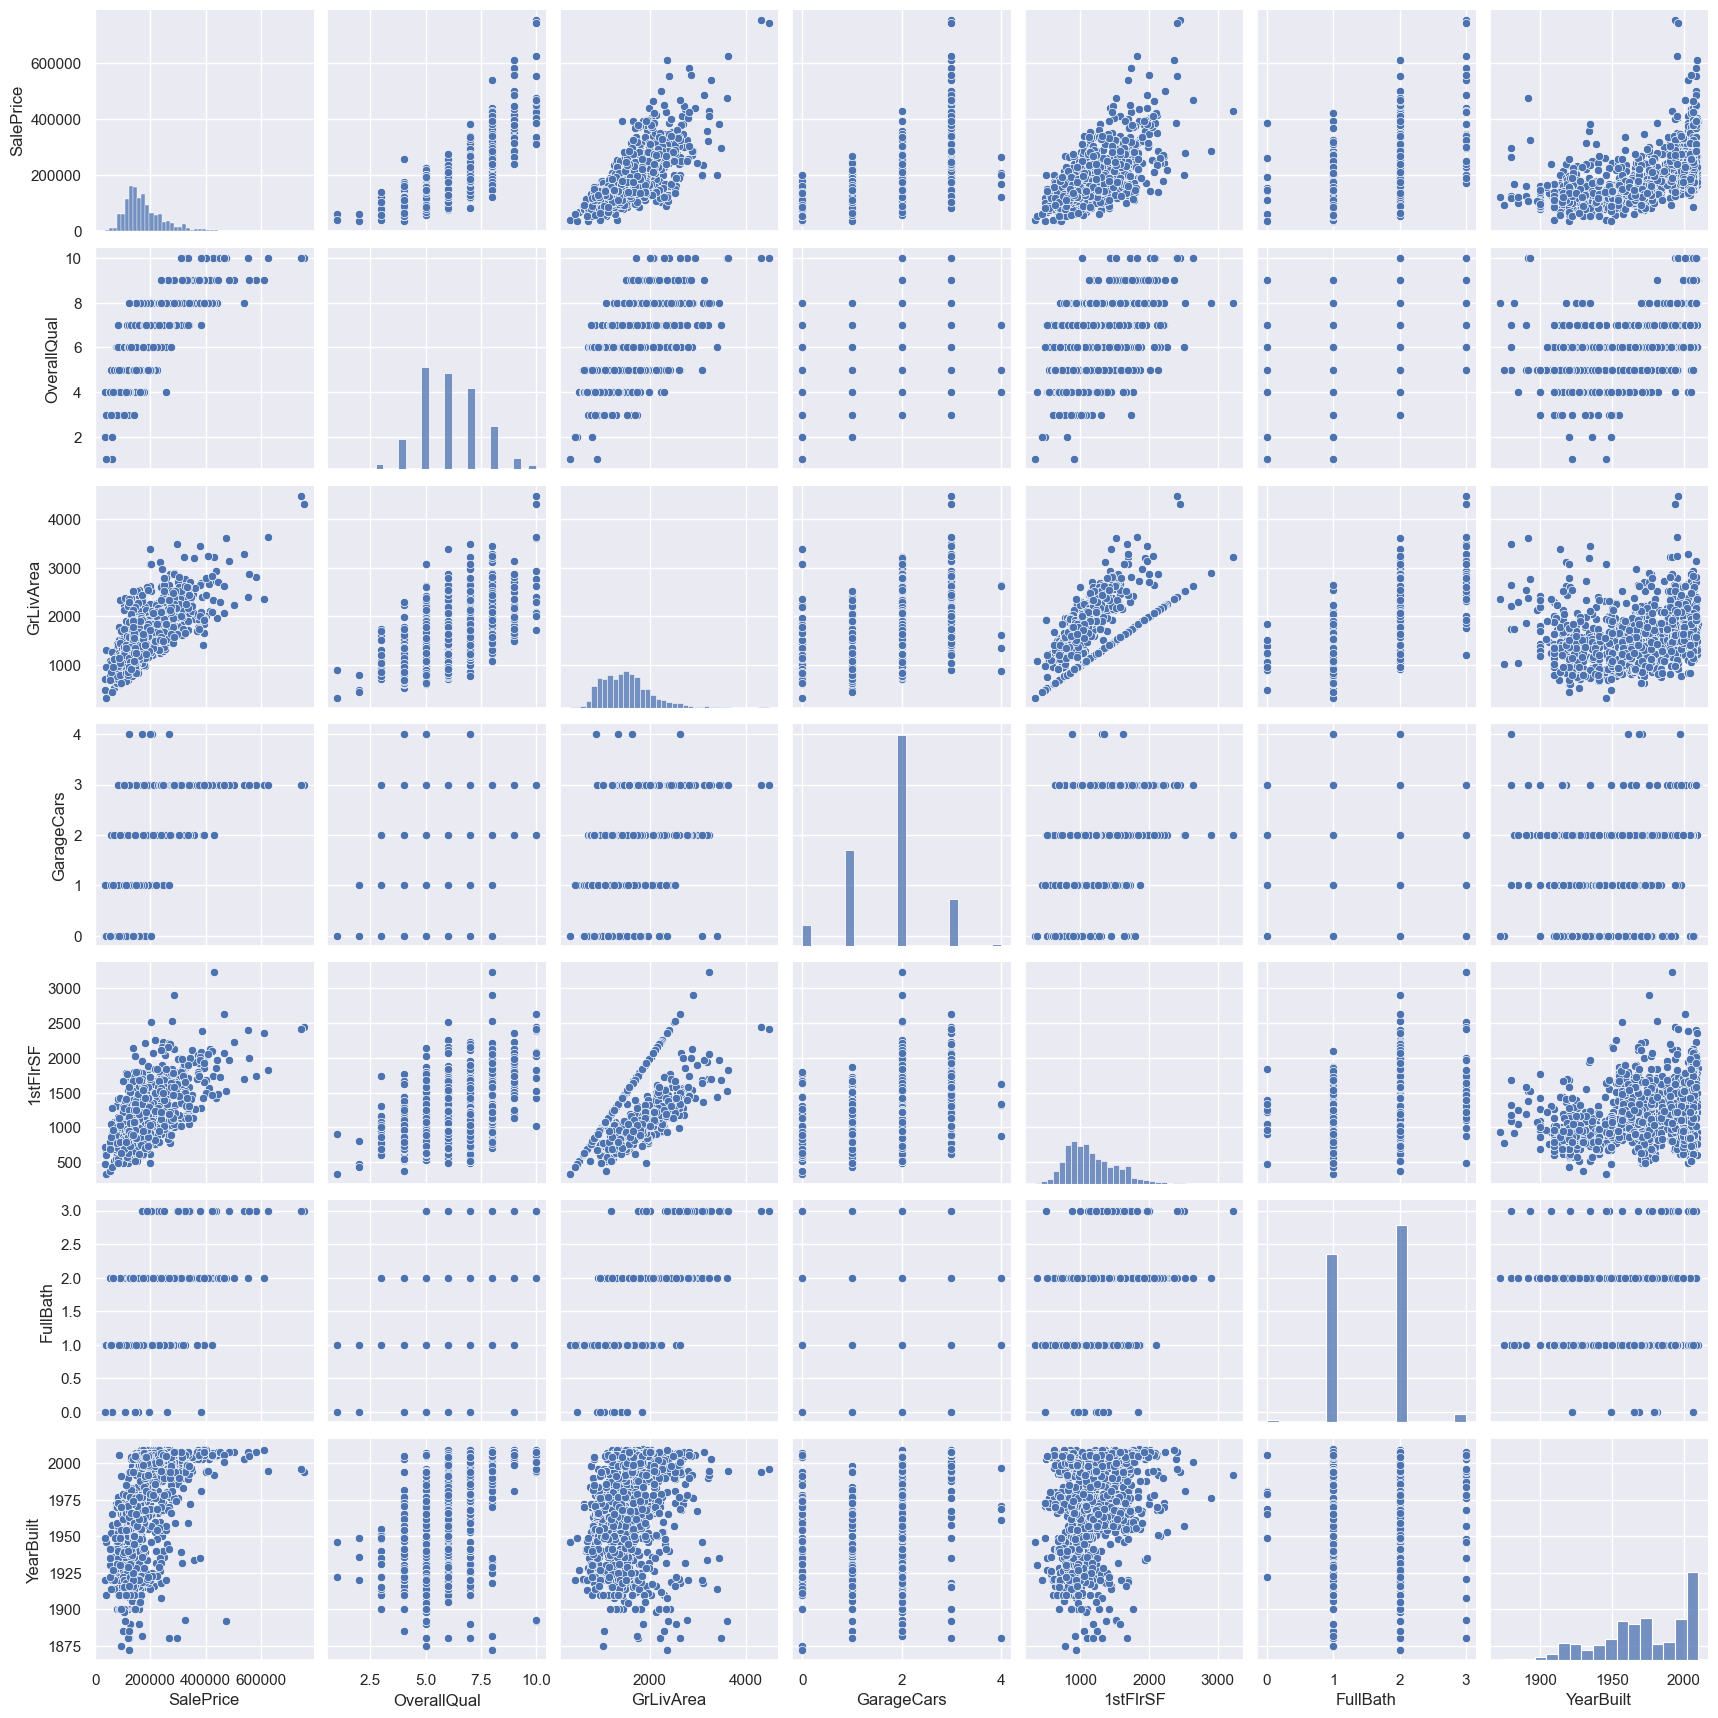

In [21]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

OverQual коррелирует с SalePrice с коэффициентом 0.79, а GrLivArea с 0.71.\
Сильно коррелируют между собой пары признаков GarageCars-GarageArea, TotalBsmtSF-1stFlrSF, TotRmsAbvGrd-GrLivArea.\
Удалим GarageArea, TotalBsmtSF, TotRmsAbvGrd и столбцы с 40%+ пропусками

In [22]:
train.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd'],axis=1,inplace=True)
test.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd'],axis=1,inplace=True)

Заполним оставшиеся пропуски

In [23]:
train['LotFrontage'].fillna(value=train['LotFrontage'].median(),inplace=True)
train['MasVnrType'].fillna(value='None',inplace=True)
train['MasVnrArea'].fillna(0,inplace=True)
train['BsmtCond'].fillna(value='TA',inplace=True)
train['BsmtExposure'].fillna(value='No',inplace=True)
train['Electrical'].fillna(value='SBrkr',inplace=True)
train['BsmtFinType2'].fillna(value='Unf',inplace=True)
train['GarageType'].fillna(value='Attchd',inplace=True)
train['GarageYrBlt'].fillna(value=train['GarageYrBlt'].median(),inplace=True)
train['GarageFinish'].fillna(value='Unf',inplace=True)
train['GarageQual'].fillna(value='TA',inplace=True)
train['GarageCond'].fillna(value='TA',inplace=True)
train['BsmtFinType1'].fillna(value='NO',inplace=True)
train['BsmtQual'].fillna(value='No',inplace=True)
train['BsmtFullBath'].fillna(value=train['BsmtFullBath'].median(),inplace=True)
train['BsmtFinSF1'].fillna(value=train['BsmtFinSF1'].median(),inplace=True)
train['BsmtFinSF2'].fillna(value=0,inplace=True)
train['BsmtUnfSF'].fillna(value=0,inplace=True)
train['BsmtHalfBath'].fillna(value=0,inplace=True)
train['GarageCars'].fillna(value=train['GarageCars'].median(),inplace=True)

Train-Validation split

In [24]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

OneHotEncoding для категориальных признаков: обучим на train и применим на train и valid

In [25]:
from sklearn.preprocessing import OneHotEncoder

X_cat = X_train[X_train.columns[X_train.dtypes == object]]
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_cat = OHE.fit_transform(X_cat)
X_train = X_train.drop(columns=X_train.columns[X_train.dtypes == object])
X_train = X_train.join(pd.DataFrame(X_cat, columns=OHE.get_feature_names_out()))
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NO,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleT

In [26]:
X_cat = X_valid[X_valid.columns[X_valid.dtypes == object]]
X_cat = OHE.transform(X_cat)
X_valid = X_valid.drop(columns=X_valid.columns[X_valid.dtypes == object])
X_valid = X_valid.join(pd.DataFrame(X_cat, columns=OHE.get_feature_names_out()))
X_valid

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NO,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleT